In [35]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as cross_validation
import sklearn.linear_model as linear_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [36]:
# Load local csv data into pandas DataFrame
# The dataset is taken from https://www.kaggle.com/flyingwombat/logistic-regression-with-uci-adult-income/data
income_df = pd.read_csv("wages.csv")
print(income_df)
print(income_df.shape)

       age         workclass  fnlwgt     education  educational-num  \
0       25           Private  226802          11th                7   
1       38           Private   89814       HS-grad                9   
2       28         Local-gov  336951    Assoc-acdm               12   
3       44           Private  160323  Some-college               10   
4       18                 ?  103497  Some-college               10   
5       34           Private  198693          10th                6   
6       29                 ?  227026       HS-grad                9   
7       63  Self-emp-not-inc  104626   Prof-school               15   
8       24           Private  369667  Some-college               10   
9       55           Private  104996       7th-8th                4   
10      65           Private  184454       HS-grad                9   
11      36       Federal-gov  212465     Bachelors               13   
12      26           Private   82091       HS-grad                9   
13    

In [37]:
income_df.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
24071,33,Private,176711,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
26647,32,Private,204567,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,99999,0,60,United-States,>50K
10192,30,Private,207172,11th,7,Never-married,Protective-serv,Not-in-family,White,Female,0,0,35,United-States,<=50K
17830,27,Private,148069,10th,6,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K
10619,24,Private,108670,Assoc-voc,11,Never-married,Other-service,Unmarried,White,Female,0,0,32,United-States,<=50K


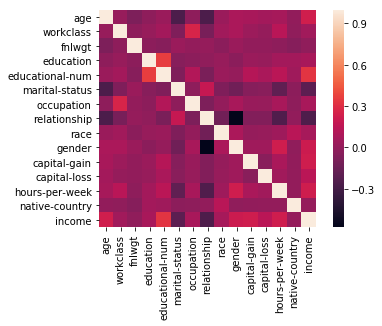

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
48838,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
48839,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
48840,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0
48841,52,5,287927,11,9,2,4,5,4,0,15024,0,40,39,1


In [38]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders


# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(income_df)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

encoded_data.tail(5)

In [39]:
# Expore the strong correaltion between "education" and "education-num" revealed by the heatmap
income_df[["education", "educational-num"]].head(10)

,education,educational-num
0,11th,7
1,HS-grad,9
2,Assoc-acdm,12
3,Some-college,10
4,Some-college,10
5,10th,6
6,HS-grad,9
7,Prof-school,15
8,Some-college,10
9,7th-8th,4


In [40]:
# "education" and "education-num" are essentially the same data, delete the numerical one
del income_df["educational-num"]

In [41]:
income_df.head(1) # Successfully deleted!

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K


In [42]:
income_df[["gender", "relationship"]].head(10)

,gender,relationship
0,Male,Own-child
1,Male,Husband
2,Male,Husband
3,Male,Husband
4,Female,Own-child
5,Male,Not-in-family
6,Male,Unmarried
7,Male,Husband
8,Female,Unmarried
9,Male,Husband


In [43]:
save_file = income_df.copy()
# Replace the inf with nan
save_file = save_file.replace({"?": np.nan})

# Drop na values
save_file = save_file.dropna()
save_file.to_csv("new_wages.csv", encoding='utf-8', index=False)